In [0]:
addDependency("org.fxyz3d:fxyz3d:0.6.0");

In [0]:
import java.util.function.Function;
import java.util.ArrayList;
import javafx.geometry.Point2D;
import javafx.scene.transform.Rotate;
import javafx.scene.shape.DrawMode;
import org.fxyz3d.geometry.Point3D;
import org.fxyz3d.scene.CubeViewer;
import org.fxyz3d.shapes.primitives.Surface3DMesh;

import javafx.scene.Group;
import javafx.scene.PerspectiveCamera;
import javafx.scene.SceneAntialiasing;
import javafx.scene.SubScene;
import org.fxyz3d.utils.CameraTransformer;

In [0]:
Function<Point2D, Number> function2D = p->Math.sin(p.getX())*Math.sin(p.getY())*10;
function2D

Function<Point2D,Number>: $Lambda/0x0000000135623238@2d17c583

In [0]:
var data = new ArrayList<Point3D>();
var divisionsY = 50;
var divisionsX = 50;
var rangeX = 10;
var rangeY = 10;
var scale = 2.0;
for (int y = 0; y <= divisionsY; y++) {
    float dy = (float)(-rangeY/2d + ((float)y /(float)divisionsY) * rangeY);
    for (int x = 0; x <= divisionsX; x++) {
        float dx = (float)(-rangeX/2d + ((float)x /(float)divisionsX) * rangeX);
        float pointY = (float)scale * function2D.apply(new Point2D(dx,dy)).floatValue();
        data.add(new Point3D(dx, pointY, dy));
    }
}
data

ArrayList<Point3D>: [Point3D{x=-5.0, y=18.390715, z=-5.0}, Point3D{x=-4.8, y=19.104929, z=-5.0}, Point3D{x=-4.6, y=19.057487, z=-5.0}, Point3D{x=-4.4, y=18.250288, z=-5.0}, Point3D{x=-4.2, y=16.715502, z=-5.0}, Point3D{x=-4.0, y=14.514326, z=-5.0}, Point3D{x=-3.8000002, y=11.73451, z=-5.0}, Point3D{x=-3.6, y=8.48687, z=-5.0}, Point3D{x=-3.4, y=4.900893, z=-5.0}, Point3D{x=-3.1999998, y=1.119524, z=-5.0}, Point3D{x=-3.0, y=-2.706468, z=-5.0}, Point3D{x=-2.8, y=-6.4245663, z=-5.0}, Point3D{x=-2.6000001, y=-9.886533, z=-5.0}, Point3D{x=-2.4, y=-12.954359, z=-5.0}, Point3D{x=-2.2, y=-15.505736, z=-5.0}, Point3D{x=-2.0, y=-17.438948, z=-5.0}, Point3D{x=-1.8000002, y=-18.676922, z=-5.0}, Point3D{x=-1.5999999, y=-19.170307, z=-5.0}, Point3D{x=-1.3999999, y=-18.899433, z=-5.0}, Point3D{x=-1.2, y=-17.8751, z=-5.0}, Point3D{x=-1.0, y=-16.13814, z=-5.0}, Point3D{x=-0.8000002, y=-13.757806, z=-5.0}, Point3D{x=-0.5999999, y=-10.828986, z=-5.0}, Point3D{x=-0.4000001, y=-7.468456, z=-5.0}, Point3D{x=

ArrayList<Point3D>: [Point3D{x=-5.0, y=18.390715, z=-5.0}, Point3D{x=-4.8, y=19.104929, z=-5.0}, Point3D{x=-4.6, y=19.057487, z=-5.0}, Point3D{x=-4.4, y=18.250288, z=-5.0}, Point3D{x=-4.2, y=16.715502, z=-5.0}, Point3D{x=-4.0, y=14.514326, z=-5.0}, Point3D{x=-3.8000002, y=11.73451, z=-5.0}, Point3D{x=-3.6, y=8.48687, z=-5.0}, Point3D{x=-3.4, y=4.900893, z=-5.0}, Point3D{x=-3.1999998, y=1.119524, z=-5.0}, Point3D{x=-3.0, y=-2.706468, z=-5.0}, Point3D{x=-2.8, y=-6.4245663, z=-5.0}, Point3D{x=-2.6000001, y=-9.886533, z=-5.0}, Point3D{x=-2.4, y=-12.954359, z=-5.0}, Point3D{x=-2.2, y=-15.505736, z=-5.0}, Point3D{x=-2.0, y=-17.438948, z=-5.0}, Point3D{x=-1.8000002, y=-18.676922, z=-5.0}, Point3D{x=-1.5999999, y=-19.170307, z=-5.0}, Point3D{x=-1.3999999, y=-18.899433, z=-5.0}, Point3D{x=-1.2, y=-17.8751, z=-5.0}, Point3D{x=-1.0, y=-16.13814, z=-5.0}, Point3D{x=-0.8000002, y=-13.757806, z=-5.0}, Point3D{x=-0.5999999, y=-10.828986, z=-5.0}, Point3D{x=-0.4000001, y=-7.468456, z=-5.0}, Point3D{x=

In [0]:
var model = new Surface3DMesh(data);
model.setDrawMode(DrawMode.FILL);
var rotateX = new Rotate(20, Rotate.X_AXIS);
var rotateY = new Rotate(-45, Rotate.Y_AXIS);
model.setScaleX(10);
model.setScaleY(10);
model.setScaleZ(10);


In [0]:
var camera = new PerspectiveCamera(true);
camera.setNearClip(0.1);
camera.setFarClip(2000.0);
camera.setTranslateY(-500);
camera.setTranslateZ(-500);
camera.setTranslateX(-500);
camera.setFieldOfView(100);

var cameraTransform = new CameraTransformer();
cameraTransform.getChildren().add(camera);
cameraTransform.ry.setAngle(25.0);
cameraTransform.rx.setAngle(-15.0);
cameraTransform.rz.setAngle(0.0);

var cv = new CubeViewer(1500,25,true);
cv.showx1AxisRectangle = false;
cv.showx2AxisRectangle = false;
cv.showy1AxisRectangle = false;
cv.showy2AxisRectangle = false;
cv.showz1AxisRectangle = false;
cv.showz2AxisRectangle = false;  
cv.axesThickness = 1;
cv.adjustPanelsByPos(25,-15,0);
cv.getChildren().add(model);

var group = new Group(cameraTransform, cv);
var subScene = new SubScene(group, 600, 600, true, SceneAntialiasing.BALANCED);
subScene.setCamera(camera);

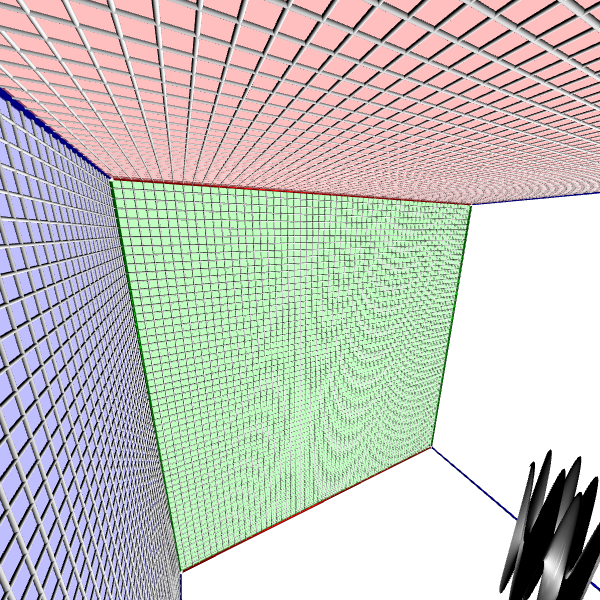

In [0]:
display(subScene);